# Heart attack Prediction using machine learning Models

In [5]:
import pandas as pd    #============= Pandas is used for manipulation and data processing ================================ 
import numpy as np     #============= numpy for scientific computing and linear algerbic ================================
import urllib         
import sklearn          #============= Using sklearn we can use the interference of different algorithm================
import matplotlib.pyplot as plt   #=========== Matplotlib is used to plot structure from its library===========================
import seaborn as sns             #============ seaborn is used for visualization using matplot===============================
sns.set()
from sklearn.model_selection import cross_val_score
import pylab as pl    #================== pylab is used to make things easy for ploting ===========================
import os 
from sklearn.preprocessing import MinMaxScaler
import datetime
import warnings        #=================It is used when a language is changed in future ===================
warnings.filterwarnings("ignore")  #=================It is used when the language is change and its ignored ===================

In [6]:
 
from numpy import genfromtxt #=================general text format =============================
from itertools import cycle  #====================for any loop ===================================================
from sklearn.metrics import accuracy_score #====================to calculate the accuracy of the models=================

# Dataset Discription

## cleveland dataset Heart Disease Dataset Source:

# http://archive.ics.uci.edu/ml/datasets/heart+disease

In [7]:
data = pd.read_csv('cleveland100.csv') #================the csv dataset is been loaded and read============================ 
print(data.shape)                     #=============print how much of attributes ========================================

(303, 17)


In [8]:
# Exploratory Data Analysis
check_missing_values = data.isnull().sum() #============ Get the number of missing data points per column==============
print(check_missing_values)                  #============ and will show up in variable explorer=============================

Unnamed: 0    0
X.1           0
X             0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64


In [9]:
data.drop('X.1',axis=1,inplace= True)
data.drop('X',axis=1,inplace= True)

In [10]:
print(data.describe())   #============ This will show and describle all the details attributes========================== 
data.describe()

       Unnamed: 0         age         sex          cp    trestbps        chol  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868    3.158416  131.689769  246.693069   
std     87.612784    9.038662    0.467299    0.960126   17.599748   51.776918   
min      1.000000   29.000000    0.000000    1.000000   94.000000  126.000000   
25%     76.500000   48.000000    0.000000    3.000000  120.000000  211.000000   
50%    152.000000   56.000000    1.000000    3.000000  130.000000  241.000000   
75%    227.500000   61.000000    1.000000    4.000000  140.000000  275.000000   
max    303.000000   77.000000    1.000000    4.000000  200.000000  564.000000   

              fbs     restecg     thalach       exang     oldpeak       slope  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.148515    0.990099  149.607261    0.326733    1.039604    1.600660   
std      0.356198    0.9949

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.670871,4.740326,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.933413,1.935849,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-0.323835,3.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### Describes the statistical data

In [11]:
print(data.info())  #============ This will show the all entries details of attributes==================================== 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Unnamed: 0    303 non-null int64
age           303 non-null int64
sex           303 non-null int64
cp            303 non-null int64
trestbps      303 non-null int64
chol          303 non-null int64
fbs           303 non-null int64
restecg       303 non-null int64
thalach       303 non-null int64
exang         303 non-null int64
oldpeak       303 non-null float64
slope         303 non-null int64
ca            303 non-null float64
thal          303 non-null float64
num           303 non-null int64
dtypes: float64(3), int64(12)
memory usage: 35.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Unnamed: 0    303 non-null int64
age           303 non-null int64
sex           303 non-null int64
cp            303 non-null int64
trestbps      303 non-null int64
chol          303 non-null int64
fbs           303 non-null int64
r

In [12]:
attributes =['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
class_to_predict=['num']

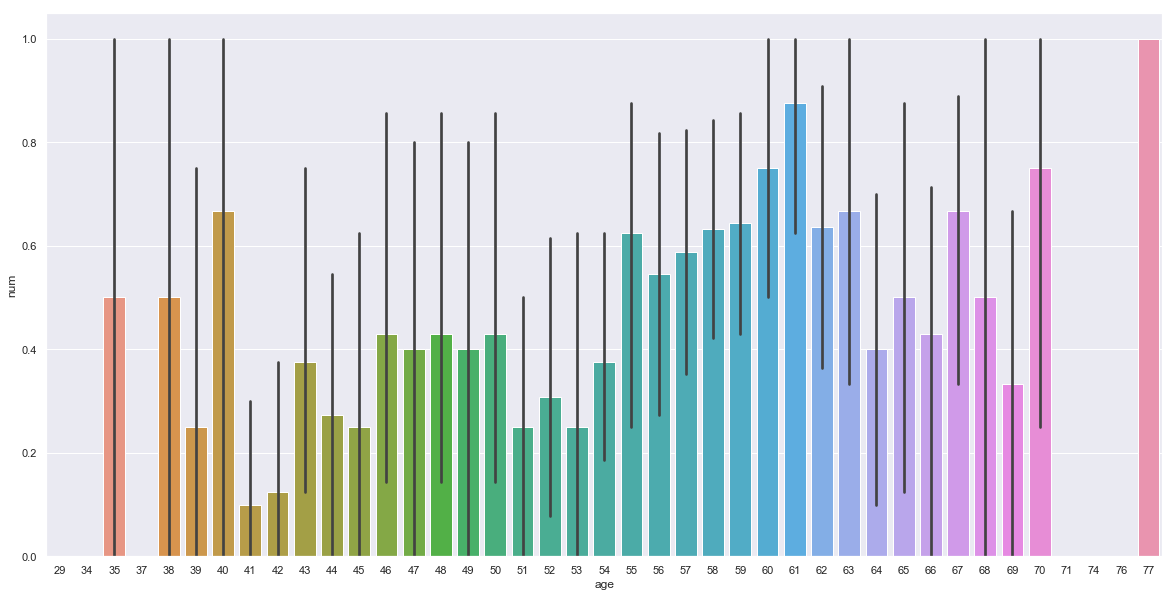

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(x="age",y="num",data=data)

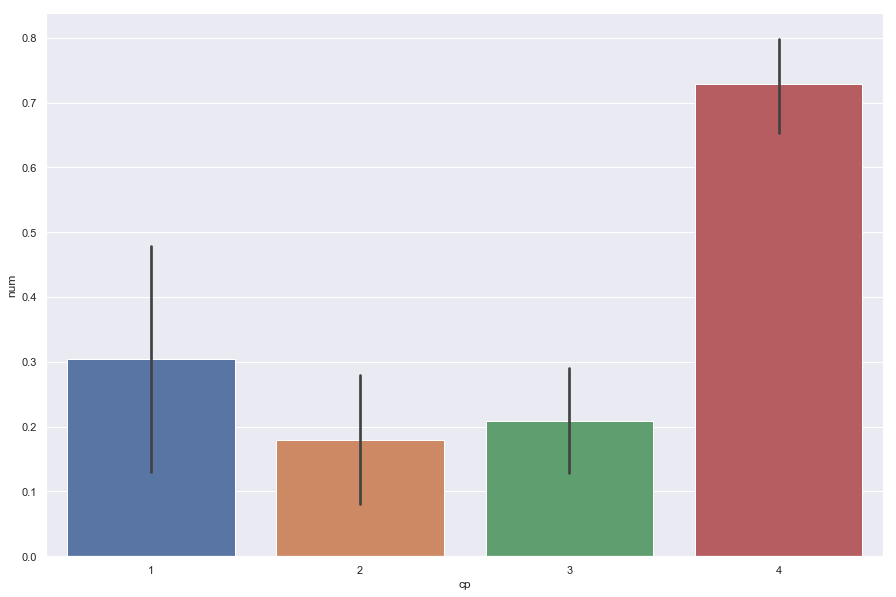

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(x="cp",y="num", data=data)

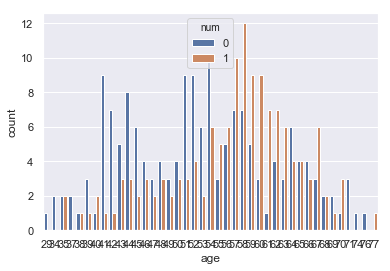

In [15]:
sns.countplot(x=data['age'],hue= data['num'])

## Choosing Actual Attributes NUM = DIAGNOSIS

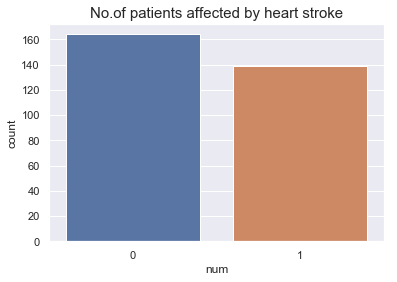

In [16]:
sns.countplot(x=data['num'])
plt.title('No.of patients affected by heart stroke',fontsize=15)
plt.show()

In [17]:
data.num= (data.num !=0)
data.num.value_counts()   #============ True= 1 and false=0 ============

False    164
True     139
Name: num, dtype: int64

In [18]:
X = data[attributes].values #============ defining x attributes==================================== 
y = data[class_to_predict].values  #============ defining y attributes==================================== 
X.shape

(303, 13)

In [19]:
y.shape

(303, 1)

In [20]:
y

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [

# Data preprocessing prepares raw data for further processing
## Preprocessing include two ways 
### Fit
### Imputer

In [21]:
#==================================preprocessing=====>fit=====================>Imputer==============================
#Taking care of nans and replace mean value
from sklearn.impute import SimpleImputer  #======= we are using imputers to build to missing values ======
imputer = SimpleImputer(missing_values=np.nan,fill_value=None, strategy='mean') #======  using mean value in missing value ===
imputer = imputer.fit(X)      #======================== fit at the missing place====================
X= imputer.transform(X)       #======= transforming to the proper stage=================
X =pd.DataFrame(X)
print(X.head(10))

     0    1    2      3      4    5    6      7    8    9    10   11   12
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0
5  56.0  1.0  2.0  120.0  236.0  0.0  0.0  178.0  0.0  0.8  1.0  0.0  3.0
6  62.0  0.0  4.0  140.0  268.0  0.0  2.0  160.0  0.0  3.6  3.0  2.0  3.0
7  57.0  0.0  4.0  120.0  354.0  0.0  0.0  163.0  1.0  0.6  1.0  0.0  3.0
8  63.0  1.0  4.0  130.0  254.0  0.0  2.0  147.0  0.0  1.4  2.0  1.0  7.0
9  53.0  1.0  4.0  140.0  203.0  1.0  2.0  155.0  1.0  3.1  3.0  0.0  7.0


In [22]:
#======Feature Scaling====StandardScaler
from sklearn.preprocessing import StandardScaler #======= using scaling we normalize in standard way=============
sc= StandardScaler()
X = sc.fit_transform(X)
print(X)

[[ 0.94872647  0.68620244 -2.25177456 ...  2.27457861 -0.71991779
   0.65178536]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  2.49941126
  -0.90048628]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  1.42630158
   1.16920923]
 ...
 [ 0.28381332  0.68620244  0.87798549 ...  0.64911323  0.35319189
   1.16920923]
 [ 0.28381332 -1.4572959  -1.20852121 ...  0.64911323  0.35319189
  -0.90048628]
 [-1.82174501  0.68620244 -0.16526786 ... -0.97635214 -1.06742858
  -0.90048628]]


## Comparing num with age trestbps sex

In [23]:
data.groupby(['age','trestbps','sex'])['num'].count()

age  trestbps  sex
29   130       1      1
34   118       0      1
               1      1
35   120       1      1
     122       1      1
     126       1      1
     138       0      1
37   120       0      1
     130       1      1
38   120       1      1
     138       1      1
39   94        0      1
     118       1      1
     138       0      1
     140       1      1
40   110       1      1
     140       1      1
     152       1      1
41   105       0      1
     110       1      2
     112       0      1
               1      1
     120       1      1
     126       0      1
     130       0      1
               1      1
     135       1      1
42   102       0      1
     120       0      1
               1      2
                     ..
66   120       1      1
     146       0      1
     150       0      1
     160       1      2
     178       0      1
67   100       1      1
     106       0      1
     115       0      1
     120       1      2
     125       1     

In [24]:
data.groupby(['cp','chol','thalach','ca'])['num'].count()

cp  chol  thalach  ca 
1   182   174      0.0    1
    186   190      0.0    1
    193   162      0.0    1
    199   178      0.0    1
    204   162      2.0    1
    211   144      0.0    1
    213   125      1.0    1
    226   114      0.0    1
    227   155      0.0    1
    231   182      0.0    1
    233   150      0.0    1
    234   131      1.0    1
          145      2.0    1
    239   151      2.0    1
    240   171      0.0    1
    244   178      2.0    1
    264   132      0.0    1
    270   145      0.0    1
    273   125      0.0    1
    282   174      1.0    1
    283   162      0.0    1
    288   159      0.0    1
    298   178      0.0    1
2   157   182      0.0    1
    160   138      0.0    1
    192   174      0.0    1
    195   179      2.0    1
    197   156      0.0    1
    198   168      1.0    1
    201   158      1.0    1
                         ..
4   294   106      3.0    1
    298   122      3.0    1
    299   125      2.0    1
          173      0.0   

In [25]:
# =====splitting the data into test and train having a test size of 30% and 70% train size , thus the test size shows in 0.3===
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
value_train = (1.0* len(X_train))/(1.0*len(data.index))
value_test = (1.0* len(X_test))/(1.0*len(data.index))
print("{0:0.4}% is train data".format(value_train*100))
print("{0:0.4}% is test data".format(value_test*100))

69.97% is train data
30.03% is test data


In [27]:
 X_train.shape, y_train.shape#======= output of train data in x and y====================

((212, 13), (212, 1))

In [28]:
X_test.shape, y_test.shape  #======= we are using imputers to build======

((91, 13), (91, 1))


## Logistic Regression from library

In [29]:
#================================================Classification Starts========================================================
#============Logistic Regression=====
from sklearn.linear_model import LogisticRegression

class_lr = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
class_lr.fit(X_train, y_train.ravel())          
class_lr_train= class_lr.predict(X_train)

## Training LG

In [30]:
from sklearn import metrics
accuracyof_LG = metrics.accuracy_score(y_train, class_lr_train)
print("accuracy: {0:.4}%".format(accuracyof_LG))

accuracy: 0.8679%


## Testing LG

In [31]:
class_lr_test=class_lr.predict(X_test)
accuracyofLG_test = metrics.accuracy_score(y_test, class_lr_test)
print("accuracy:{0:.4}%".format(accuracyofLG_test))

accuracy:0.8132%


## Confusion Matrix for Logistic Regression

In [32]:
print ("Confusion Matrix for Logistic Regression")
print ("{0}".format(metrics.confusion_matrix(y_test, class_lr_test, labels=[1, 0])))


Confusion Matrix for Logistic Regression
[[32 12]
 [ 5 42]]


## Classification for Logistic Regression

In [33]:
print("classification report Logistic Regression")
print (metrics.classification_report(y_test, class_lr_test, labels=[1, 0]))

classification report Logistic Regression
              precision    recall  f1-score   support

           1       0.86      0.73      0.79        44
           0       0.78      0.89      0.83        47

   micro avg       0.81      0.81      0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [34]:
## 10 fold cross validation
lrgcross= LogisticRegression()
print(cross_val_score(lrgcross, X, y, cv=10, scoring= 'accuracy'))

[0.87096774 0.80645161 0.80645161 0.96774194 0.8        0.7
 0.83333333 0.86666667 0.73333333 0.86206897]


## Decision Tree import from library

In [35]:
#=================Decision Tree========
from sklearn.tree import DecisionTreeClassifier
class_dt = DecisionTreeClassifier(random_state=0)
class_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Training Decision tree

In [36]:
class_DT_train= class_dt.predict(X_train)
accuracyof_DT = metrics.accuracy_score(y_train, class_DT_train)
print("accuracy: {0:.4}%".format(accuracyof_DT))

accuracy: 1.0%


## Testing Decision Tree

In [37]:
class_DT_test=class_dt.predict(X_test)
accuracyofDT_test = metrics.accuracy_score(y_test, class_DT_test)
print("accuracy:{0:.4}%".format(accuracyofDT_test))

accuracy:0.7912%


## Confusion Matrix

In [38]:
print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, class_DT_test, labels=[1, 0])))


Confusion Matrix
[[33 11]
 [ 8 39]]


## Classification

In [39]:
print("classification report DT")
print (metrics.classification_report(y_test, class_DT_test, labels=[1, 0]))

classification report DT
              precision    recall  f1-score   support

           1       0.80      0.75      0.78        44
           0       0.78      0.83      0.80        47

   micro avg       0.79      0.79      0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [40]:
## 10 fold cross validation
dtcross= DecisionTreeClassifier()
print(cross_val_score(dtcross, X, y, cv=10, scoring= 'accuracy'))

[0.83870968 0.74193548 0.87096774 0.77419355 0.73333333 0.73333333
 0.56666667 0.76666667 0.73333333 0.68965517]


## GaussianNB from library

In [41]:
#============GaussianNB=====
from sklearn.naive_bayes import GaussianNB
class_gnb = GaussianNB()
class_gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Train GNB

In [42]:
class_GNB_train=class_gnb.predict(X_train)

In [43]:
from sklearn import metrics
Accuracyofnaive_bayes_train = metrics.accuracy_score(y_train, class_GNB_train)

print ("Accuracy of naive bayes  model is : {0:.4}".format(Accuracyofnaive_bayes_train))

Accuracy of naive bayes  model is : 0.8679


## Test GNB

In [44]:
class_GNBtest =class_gnb.predict(X_test)

In [45]:
accuracyofnaive_bayes_test = metrics.accuracy_score(y_test, class_GNBtest)

print ("accuracy of naive bayes model is : {0:.4}".format(accuracyofnaive_bayes_test))

accuracy of naive bayes model is : 0.8242


## Confusion matrix for GNB

In [46]:
print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, class_GNBtest, labels=[1, 0])))


Confusion Matrix
[[33 11]
 [ 5 42]]


## classification for GNB

In [47]:
print ("Classification Report")

print ("{0}".format(metrics.classification_report(y_test,class_GNBtest, labels=[1, 0])))

Classification Report
              precision    recall  f1-score   support

           1       0.87      0.75      0.80        44
           0       0.79      0.89      0.84        47

   micro avg       0.82      0.82      0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [48]:
## 10 fold cross validation
gbncross= GaussianNB()
print(cross_val_score(gbncross, X, y, cv=10, scoring= 'accuracy'))

[0.83870968 0.83870968 0.93548387 0.90322581 0.8        0.7
 0.86666667 0.9        0.76666667 0.86206897]



## import KNN from library

In [49]:
#========KNN=================
from sklearn.neighbors import KNeighborsClassifier
class_neigh = KNeighborsClassifier(n_neighbors=3)
class_neigh.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## PREDICT TRain KNN

In [50]:
class_KNN_train=class_neigh.predict(X_train)

In [51]:
accuracyof_KNN = metrics.accuracy_score(y_train, class_KNN_train)
print("accuracy: {0:.4}%".format(accuracyof_KNN))

accuracy: 0.9009%


## PREDICT KNN Test

In [52]:
class_KNN_test=class_neigh.predict(X_test)
accuracyofKNN_test = metrics.accuracy_score(y_test, class_KNN_test)
print("accuracy:{0:.4}%".format(accuracyofKNN_test))

accuracy:0.8242%


In [53]:
print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, class_KNN_test, labels=[1, 0])))


Confusion Matrix
[[33 11]
 [ 5 42]]


In [54]:
print ("Classification Report\n")

print ("{0}".format(metrics.classification_report(y_test, class_KNN_test, labels=[ 1,0])))

Classification Report

              precision    recall  f1-score   support

           1       0.87      0.75      0.80        44
           0       0.79      0.89      0.84        47

   micro avg       0.82      0.82      0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [55]:
## 10 fold cross validation
knncross= KNeighborsClassifier()
print(cross_val_score(knncross, X, y, cv=10, scoring= 'accuracy'))

[0.87096774 0.80645161 0.90322581 0.93548387 0.83333333 0.83333333
 0.8        0.83333333 0.76666667 0.75862069]


## Import Multilayer preception from NN library

In [56]:
#==============Deep Learning Neural Network< multilayer perception====
from sklearn.neural_network import MLPClassifier
class_mlp = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=10, random_state=1)
class_mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## Predict train MLP

In [59]:
class_mlp_train = class_mlp.predict(X_train)
accuracyof_mlp = metrics.accuracy_score(y_train, class_mlp_train)

print ("Accuracy: {0:.4f}".format(accuracyof_mlp))

Accuracy: 0.8585


## Predict test MLP

In [57]:
class_mlp_test = class_mlp.predict(X_test)
accuracyofmlp_test = metrics.accuracy_score(y_test, class_mlp_test)
print ("Accuracy: {0:.4f}".format(accuracyofmlp_test))

Accuracy: 0.7253


## Confusion matrix for MLP

In [58]:
print ("Confusion Matrix")

print ("{0}".format(metrics.confusion_matrix(y_test, class_mlp_test, labels=[1, 0])))

Confusion Matrix
[[24 20]
 [ 5 42]]


## Classification FOr MLP

In [60]:
print ("Classification Report\n")

print ("{0}".format(metrics.classification_report(y_test, class_mlp_test, labels=[ 1,0])))

Classification Report

              precision    recall  f1-score   support

           1       0.83      0.55      0.66        44
           0       0.68      0.89      0.77        47

   micro avg       0.73      0.73      0.73        91
   macro avg       0.75      0.72      0.71        91
weighted avg       0.75      0.73      0.72        91



In [61]:
## 10 fold cross validation
mlpcross= MLPClassifier()
print(cross_val_score(mlpcross, X, y, cv=10, scoring= 'accuracy'))

[0.87096774 0.80645161 0.77419355 0.90322581 0.83333333 0.8
 0.76666667 0.83333333 0.7        0.75862069]


## Import SVM from library

In [62]:
#===================SVM============
from sklearn.svm import LinearSVC
class_svm = LinearSVC(random_state=0, tol=1e-5)
class_svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

## Predict Train SVM 

In [63]:
class_svm_train = class_svm.predict(X_train)
accuracyof_svm = metrics.accuracy_score(y_train, class_svm_train)

print ("Accuracy: {0:.4f}".format(accuracyof_svm))

Accuracy: 0.8632


## Predict test SVM

In [64]:
class_svm_test = class_svm.predict(X_test)
accuracyof_svmtest = metrics.accuracy_score(y_test, class_svm_test)

print ("Accuracy: {0:.4f}".format(accuracyof_svmtest))

Accuracy: 0.8132


## Confusion matrix for svm

In [65]:
print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, class_svm_test, labels=[1, 0])))

Confusion Matrix
[[32 12]
 [ 5 42]]


## Classification for svm

In [66]:
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test, class_svm_test, labels=[ 1,0])))

Classification Report

              precision    recall  f1-score   support

           1       0.86      0.73      0.79        44
           0       0.78      0.89      0.83        47

   micro avg       0.81      0.81      0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [67]:
## 10 fold cross validation
svccross= LinearSVC()
print(cross_val_score(svccross, X, y, cv=10, scoring= 'accuracy'))

[0.90322581 0.83870968 0.80645161 0.96774194 0.8        0.7
 0.83333333 0.86666667 0.73333333 0.86206897]


## Import XGBOOST fom library

In [68]:
from xgboost import XGBClassifier
class_XGB =XGBClassifier().fit(X_train, y_train)

## XGBOSST Train

In [69]:
class_XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [70]:
class_XGB_train = class_XGB.predict(X_train)
accuracyof_XGB = metrics.accuracy_score(y_train, class_XGB_train)

print ("Accuracy: {0:.4f}".format(accuracyof_XGB))

Accuracy: 0.9953


## XGB Test

In [71]:
class_XGB_test = class_XGB.predict(X_test)
accuracyof_XGBtest = metrics.accuracy_score(y_test, class_XGB_test)

print ("Accuracy: {0:.4f}".format(accuracyof_XGBtest))

Accuracy: 0.7582


## XGB CONFUSION Matrix

In [72]:
print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, class_XGB_test, labels=[1, 0])))

Confusion Matrix
[[30 14]
 [ 8 39]]


## XGBclassification

In [73]:
print ("Classification Report of XGbooster\n")

print ("{0}".format(metrics.classification_report(y_test, class_XGB_test, labels=[ 1,0])))

Classification Report of XGbooster

              precision    recall  f1-score   support

           1       0.79      0.68      0.73        44
           0       0.74      0.83      0.78        47

   micro avg       0.76      0.76      0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [74]:
## 10 fold cross validation
xgcross= XGBClassifier()
print(cross_val_score(xgcross, X, y, cv=10, scoring= 'accuracy'))

[0.90322581 0.77419355 0.90322581 0.87096774 0.9        0.63333333
 0.76666667 0.83333333 0.73333333 0.75862069]


In [75]:
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,False
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,True
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,True
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,False
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,False


## Bar plot

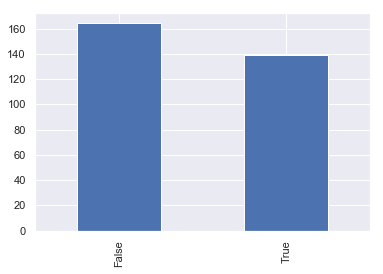

In [81]:
#=================================Plot only the values of num using plot bar==============================================
data["num"].value_counts().plot.bar()

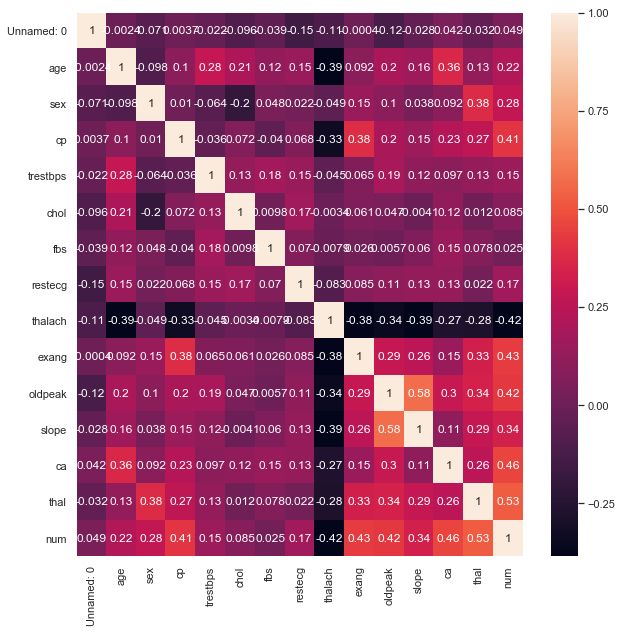

In [82]:
#=====using Heat map to see the coreelation between variables=============================
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),robust=True,annot=True)

## Histogram

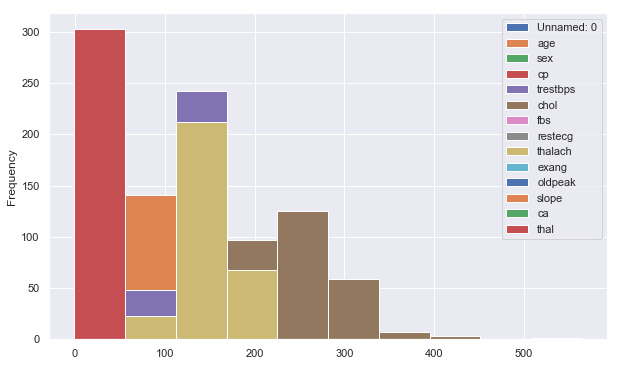

In [83]:
#====================================Histogram for all features of the dataset=======================================
data.plot(kind= 'hist',figsize=(10,6), )

plt.show()

## Boxplot

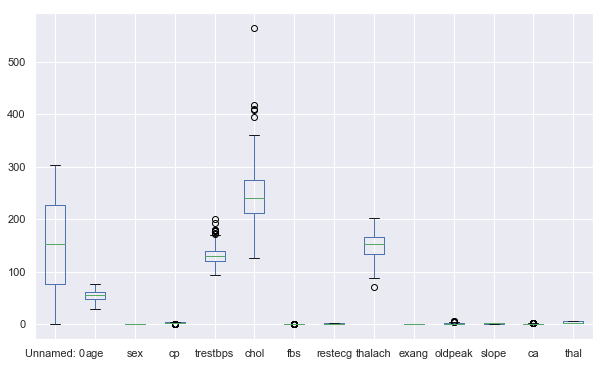

In [84]:
#======================================== using boxplot we Detect outliers=============================================
data.plot(kind= 'box',figsize=(10,6), )

plt.show()
